In [1]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

%config InlineBackend.figure_format = 'retina' 

plt.rcParams['figure.figsize'] = 8, 5

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_zika = pd.read_csv("final_clean_zika.csv",)
data_zika.head()

,Last Update,Country,Province/State,Confirmed
0,3/19/2016,Argentina,Buenos Aires,2
1,3/19/2016,Argentina,Buenos Aires,1
2,3/19/2016,Argentina,Buenos Aires,127
3,3/19/2016,Argentina,CABA,9
4,3/19/2016,Argentina,CABA,68


In [3]:
data_zika['Last Update'] = data_zika['Last Update'].apply(pd.to_datetime)
data_zika.head()

,Last Update,Country,Province/State,Confirmed
0,2016-03-19,Argentina,Buenos Aires,2
1,2016-03-19,Argentina,Buenos Aires,1
2,2016-03-19,Argentina,Buenos Aires,127
3,2016-03-19,Argentina,CABA,9
4,2016-03-19,Argentina,CABA,68


In [4]:
countries_zika = data_zika['Country'].unique().tolist()
print(countries_zika)

['Argentina', 'Brazil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro', 'Colombia']


In [5]:
print(f"Total countries affected by Zika Virus: {len(countries_zika)}")

Total countries affected by Zika Virus: 8


In [6]:
from datetime import date
data_date_zika = data_zika[data_zika['Last Update'] > pd.Timestamp(date(2016,1,1))]
data_date_zika['Confirmed'] = pd.to_numeric(data_date_zika['Confirmed'])
data_date_zika.head()

,Last Update,Country,Province/State,Confirmed
0,2016-03-19,Argentina,Buenos Aires,2
1,2016-03-19,Argentina,Buenos Aires,1
2,2016-03-19,Argentina,Buenos Aires,127
3,2016-03-19,Argentina,CABA,9
4,2016-03-19,Argentina,CABA,68


In [7]:
data_date_zika.dtypes

Last Update       datetime64[ns]
Country                   object
Province/State            object
Confirmed                  int64
dtype: object

In [9]:
cases_zika = pd.DataFrame(data_date_zika.groupby('Country').sum()['Confirmed'])
cases_zika.reset_index()
cases_zika

,Confirmed
Country,
Argentina,21826
Brazil,2703393
Centro,254
Colombia,198396
Nordeste,236246
Norte,559
Sudeste,2639
Sul,25511


In [11]:
cases_zika['Country'] = cases_zika.index
cases_zika.index=np.arange(1,9)
cases_zika

,Confirmed,Country
1,21826,Argentina
2,2703393,Brazil
3,254,Centro
4,198396,Colombia
5,236246,Nordeste
6,559,Norte
7,2639,Sudeste
8,25511,Sul


In [12]:
global_cases_zika = cases_zika[['Country','Confirmed']]
global_cases_zika

,Country,Confirmed
1,Argentina,21826
2,Brazil,2703393
3,Centro,254
4,Colombia,198396
5,Nordeste,236246
6,Norte,559
7,Sudeste,2639
8,Sul,25511


In [13]:
data_corona = pd.read_csv("Coronavirus_data.csv",)
data_corona.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,China,1/22/2020 12:00,1,0,0
1,Beijing,China,1/22/2020 12:00,14,0,0
2,Chongqing,China,1/22/2020 12:00,6,0,0
3,Fujian,China,1/22/2020 12:00,1,0,0
4,Gansu,China,1/22/2020 12:00,0,0,0


In [14]:
data_corona['Last Update'] = data_corona['Last Update'].apply(pd.to_datetime)
data_corona.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,China,2020-01-22 12:00:00,1,0,0
1,Beijing,China,2020-01-22 12:00:00,14,0,0
2,Chongqing,China,2020-01-22 12:00:00,6,0,0
3,Fujian,China,2020-01-22 12:00:00,1,0,0
4,Gansu,China,2020-01-22 12:00:00,0,0,0


In [15]:
countries_corona = data_corona['Country'].unique().tolist()
print(countries_corona)

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy']


In [16]:
print(f"Total countries affected by Coronavirus: {len(countries_corona)}")

Total countries affected by Coronavirus: 27


In [17]:
from datetime import date
data_date_corona = data_corona[data_corona['Last Update'] > pd.Timestamp(date(2020,1,30))]

data_date_corona.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
375,Hubei,Mainland China,2020-01-30 21:30:00,5806,204,116
376,Zhejiang,Mainland China,2020-01-30 21:30:00,537,0,9
377,Guangdong,Mainland China,2020-01-30 21:30:00,393,0,11
378,Henan,Mainland China,2020-01-30 21:30:00,352,2,3
379,Hunan,Mainland China,2020-01-30 21:30:00,332,0,2


In [18]:
data_date_zika.dtypes

Last Update       datetime64[ns]
Country                   object
Province/State            object
Confirmed                  int64
dtype: object

In [19]:
cases_corona = pd.DataFrame(data_date_corona.groupby('Country')['Confirmed'].sum())
cases_corona['Country'] = cases_corona.index
cases_corona.index=np.arange(1,24)

In [20]:
global_cases_corona = cases_corona[['Country','Confirmed']]
global_cases_corona

,Country,Confirmed
1,Australia,9
2,Cambodia,1
3,Canada,3
4,Finland,1
5,France,5
6,Germany,4
7,Hong Kong,12
8,India,1
9,Italy,2
10,Japan,11


In [37]:
world_data_corona = pd.DataFrame({
   'name':list(global_cases_corona['Country']),
    'lat':[-25.27,12.57,56.13,61.92,46.23,51.17,22.32,20.59,41.87,36.2,22.2,35.86,4.21,28.39,12.87,1.35,35.91,7.87,23.7,15.87,37.09,23.42,14.06,],
   'lon':[133.78,104.99,-106.35,25.75,2.21,10.45,114.17,78.96,12.56,138.25,113.54,104.19,101.98,84.12,121.77,103.82,127.77,80.77,120.96,100.99,-95.71,53.84,108.28],
   'Confirmed':list(global_cases_corona['Confirmed']),
})


world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Terrain')

for lat, lon, value, name in zip(world_data_corona['lat'], world_data_corona['lon'], world_data_corona['Confirmed'], 
                                 world_data_corona['name']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases on January 30, 2020</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)

world_data_zika = pd.DataFrame({
   'name':list(global_cases_zika['Country']),
    'lat':[-38.4161, -14.2350,-5.402580, -10.0626, -25.4342, -4.5709, -22.9071, -20.3332],
   'lon':[-63.6167, -51.9253, -36.954105, -42.5510, -49.2663, -74.2973, -43.1819, -46.2092],
   'Confirmed':list(global_cases_zika['Confirmed']),
})

for lat, lon, value, name in zip(world_data_zika['lat'], world_data_zika['lon'], world_data_zika['Confirmed'], 
                                 world_data_zika['name']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases on January 9, 2016</strong>: ' + str(value) + '<br>'),
                        color='yellow',
                        
                        fill_color='yellow',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

In [27]:
print(f"Total Confirmed Zika Cases: {data_date_zika['Confirmed'].sum()}")
print(f"Globally Confirmed Corona Cases: {data_date_corona['Confirmed'].sum()}")
print(f"Globally Confirmed Corona Deaths: {data_date_corona['Deaths'].sum()}")
print(f"Globally Confirmed Corona Recovered: {data_date_corona['Recovered'].sum()}")

Total Confirmed Zika Cases: 3188824
Globally Confirmed Corona Cases: 9776
Globally Confirmed Corona Deaths: 213
Globally Confirmed Corona Recovered: 187


In [28]:
data_date_zika.groupby(['Country','Province/State']).sum()

Confirmed
Country   Province/State                
Argentina Buenos Aires               130
          Buenos_Aires              3149
          CABA                      1899
          Catamarca                  212
          Chaco                     1017
...                                  ...
Sul       Atlantico                    1
          Bahia                        1
          Oeste                     8053
          Parana                       1
          Rio_Grande_do_Norte          1

[129 rows x 1 columns]

In [30]:
Argentina = data_date_zika[data_date_zika['Country']=='Argentina']
Argentina

,Last Update,Country,Province/State,Confirmed
0,2016-03-19,Argentina,Buenos Aires,2
1,2016-03-19,Argentina,Buenos Aires,1
2,2016-03-19,Argentina,Buenos Aires,127
3,2016-03-19,Argentina,CABA,9
4,2016-03-19,Argentina,CABA,68
...,...,...,...,...
567,2016-06-26,Argentina,Sgo_Del_Estero,6
568,2016-06-26,Argentina,Tucuman,22
569,2016-06-26,Argentina,Tucuman,9
570,2016-06-26,Argentina,Tucuman,65


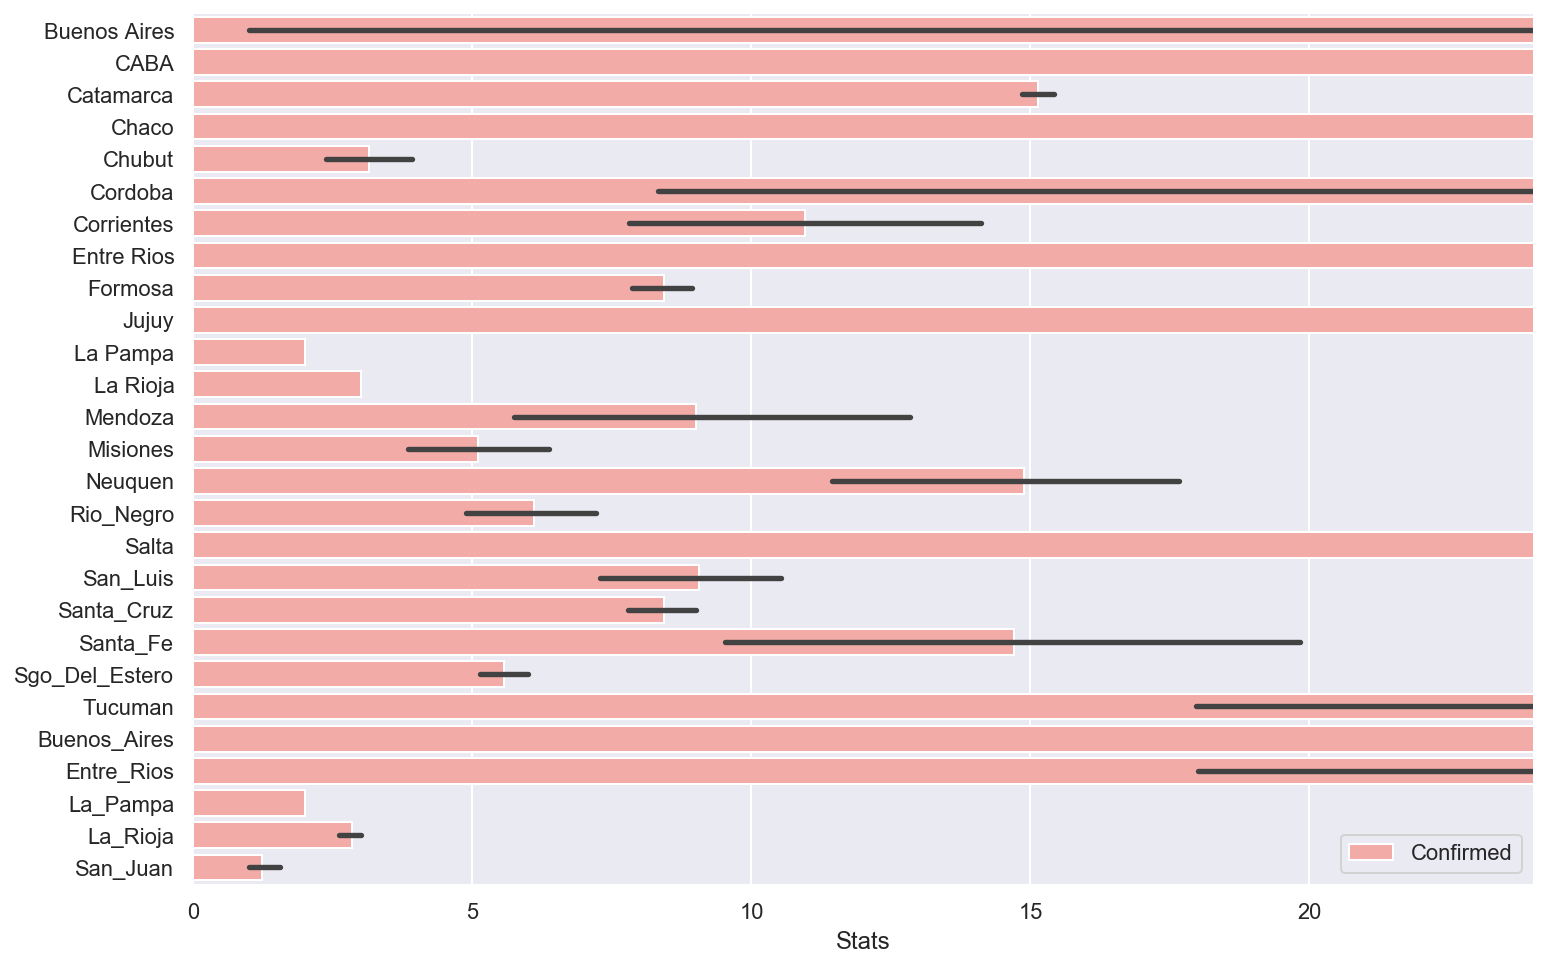

In [34]:
f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=Argentina[1:],
            label="Confirmed", color="r")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

In [29]:
data_date_corona.groupby(['Country','Province/State']).sum()

Confirmed  Deaths  Recovered
Country        Province/State                                
Australia      New South Wales           4       0          2
               Queensland                3       0          0
               Victoria                  2       0          0
Canada         British Columbia          1       0          0
               Ontario                   2       0          0
Germany        Bavaria                   4       0          0
Hong Kong      Hong Kong                12       0          0
Macau          Macau                     7       0          0
Mainland China Anhui                   237       0          3
               Beijing                 121       1          5
               Chongqing               206       0          1
               Fujian                  101       0          0
               Gansu                    29       0          0
               Guangdong               393       0         11
               Guangxi                  87       0          2
               Guizhou                  15       0          1
               Hainan                   50       1          1
               Hebei                    82       1          0
               Heilongjiang             59       2          0
               Henan                   352       2          3
               Hubei                  5806     204        116
               Hunan                   332       0          2
               Inner Mongolia           20       0          0
               Jiangsu                 168       0          2
               Jiangxi                 240       0          7
               Jilin                    14       0          1
               Liaoning                 45       0          1
               Ningxia                  21       0          1
               Qinghai                   8       0          0
               Shaanxi                  87       0          0
               Shandong                178       0          2
               Shanghai                128       1          9
               Shanxi                   39       0          1
               Sichuan                 177       1          1
               Tianjin                  32       0          0
               Tibet                     1       0          0
               Xinjiang                 17       0          0
               Yunnan                   76       0          0
               Zhejiang                537       0          9
Taiwan         Taiwan                    9       0          0
US             Arizona                   1       0          0
               California                2       0          0
               Illinois                  2       0          0
               Washington                1       0          0

In [31]:
data_date_corona.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
Mainland China    213
Macau               0
Cambodia            0
Canada              0
Finland             0
Name: Deaths, dtype: int64

In [32]:
data_date_corona.groupby('Country')['Recovered'].sum().sort_values(ascending=False)[:5]

Country
Mainland China    179
Thailand            5
Australia           2
Japan               1
Taiwan              0
Name: Recovered, dtype: int64

In [33]:
China = data_date_corona[data_date_corona['Country']=='Mainland China']
China

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
375,Hubei,Mainland China,2020-01-30 21:30:00,5806,204,116
376,Zhejiang,Mainland China,2020-01-30 21:30:00,537,0,9
377,Guangdong,Mainland China,2020-01-30 21:30:00,393,0,11
378,Henan,Mainland China,2020-01-30 21:30:00,352,2,3
379,Hunan,Mainland China,2020-01-30 21:30:00,332,0,2
380,Jiangxi,Mainland China,2020-01-30 21:30:00,240,0,7
381,Anhui,Mainland China,2020-01-30 21:30:00,237,0,3
382,Chongqing,Mainland China,2020-01-30 21:30:00,206,0,1
383,Shandong,Mainland China,2020-01-30 21:30:00,178,0,2
384,Sichuan,Mainland China,2020-01-30 21:30:00,177,1,1


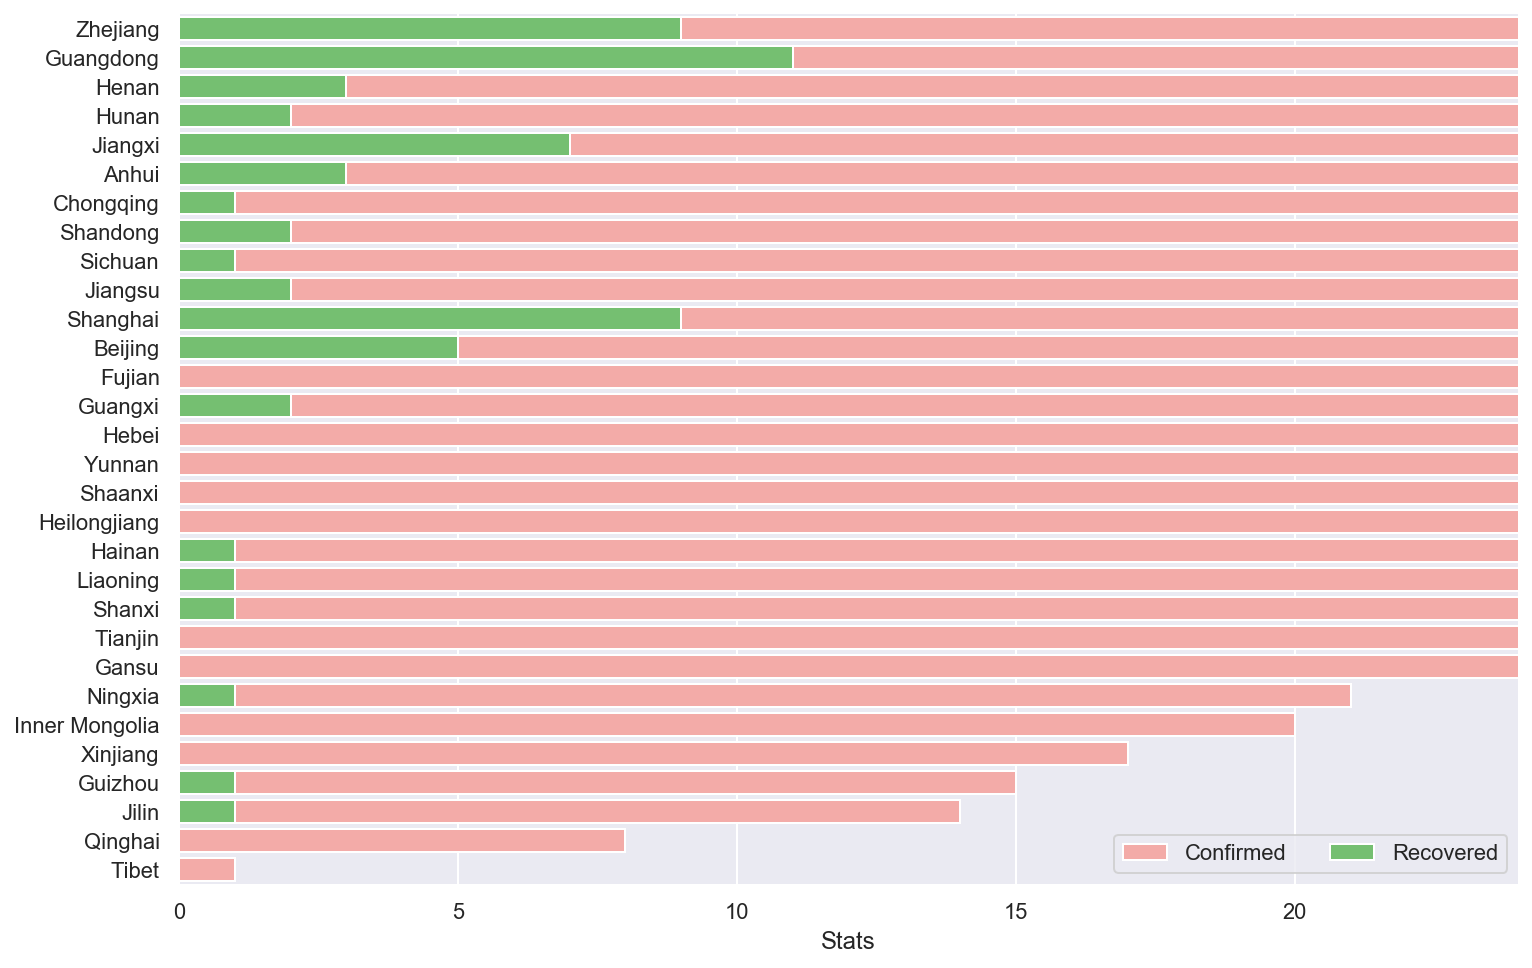

In [35]:
f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=China[1:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=China[1:],
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

In [38]:
data_date_corona.to_csv("corona_finalized.csv", encoding = 'utf-8', index = False, header = True)

In [39]:
data_date_zika.to_csv("zika_finalized.csv", encoding = 'utf-8', index = False, header = True)